In [2]:
%matplotlib inline
import numpy as np
import cv2
import pandas as pd
import glob
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from lesson_functions import *

In [1]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def hist_features(img, nbins=32, bins_range=(0,256)):
    colors=(cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2LUV,cv2.COLOR_RGB2HLS,cv2.COLOR_RGB2YUV,\
           cv2.COLOR_RGB2HLS,cv2.COLOR_RGB2YUV,cv2.COLOR_RGB2YCrCb)
    
    return np.concatenate([color_hist(img, nbins=nbins, bins_range=bins_range)]+\
                          [color_hist(cv2.cvtColor(img, color), nbins=nbins, bins_range=bins_range) \
                        for color in colors])

def get_hist_features(imgs, nbins=32, bins_range=(0,256), from_file=True):
    f=mpl.image.imread if from_file else lambda x:x
    return np.concatenate([[hist_features(f(a), bins_range=bins_range, nbins=nbins)] \
                               for a in imgs],axis=0)
    
        

In [4]:

gl_far=glob.glob('data/vehicles/GTI_Far/*')

In [5]:
ch=get_hist_features(gl_far)

In [6]:
dist=((ch[:-1]-ch[1:])**2).sum(axis=1)**(0.5)

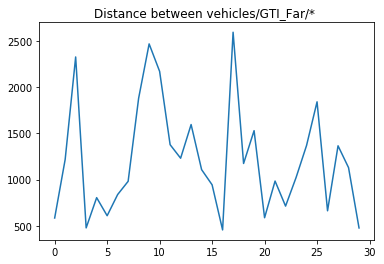

In [10]:
plt.title('Distance between vehicles/GTI_Far/* ')
plt.plot(dist[:30])
plt.savefig('output_images/dist.png')
plt.show()

In [11]:
change=np.where(dist>2000)[0]+1

In [12]:
change=np.where(dist>2000)[0]+1
change=np.concatenate([[0],change])

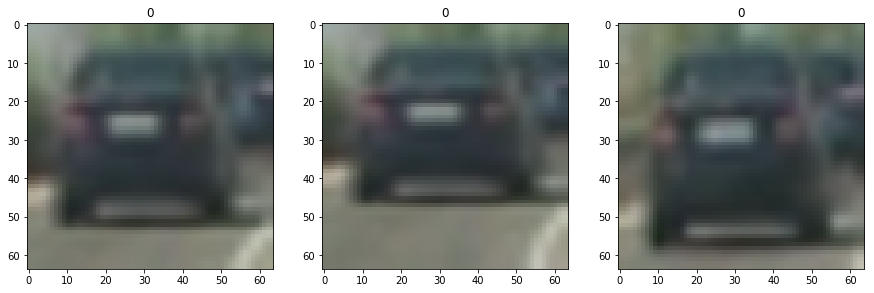

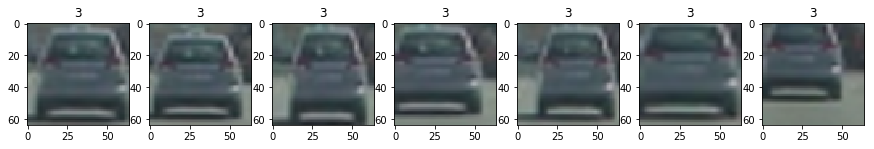

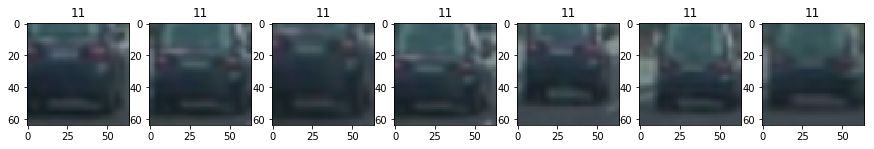

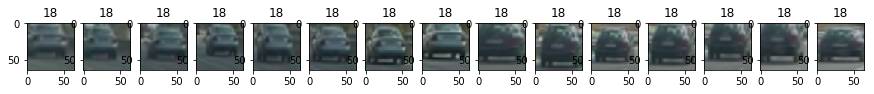

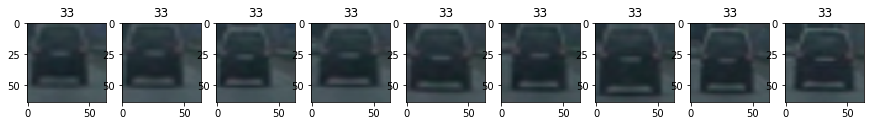

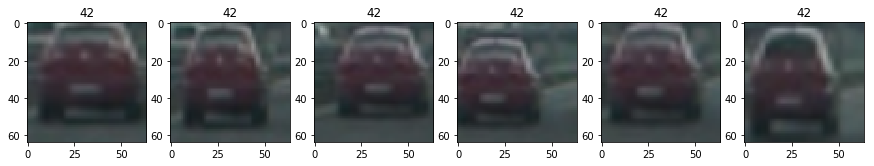

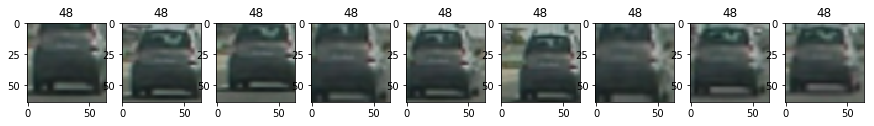

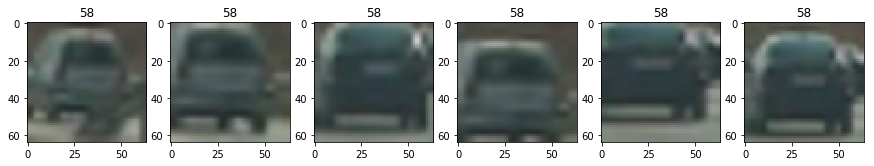

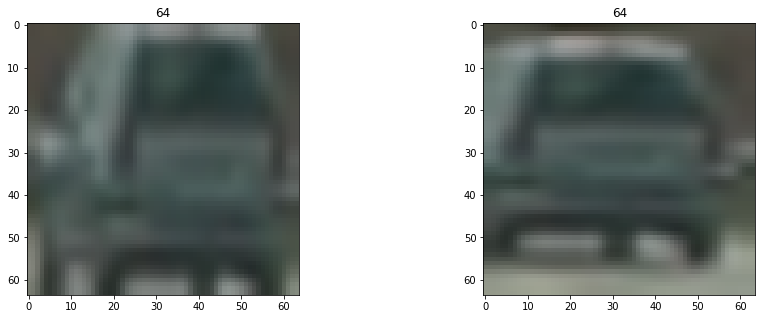

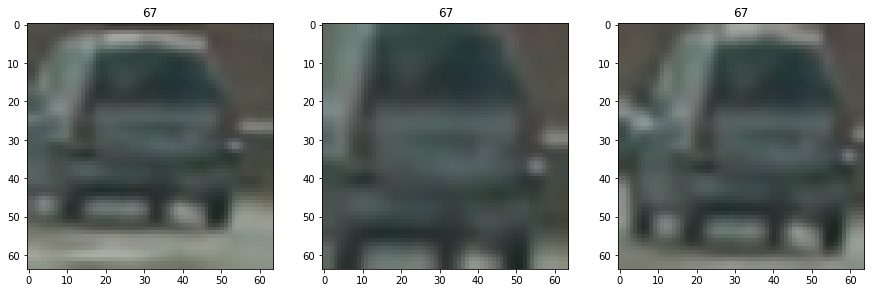

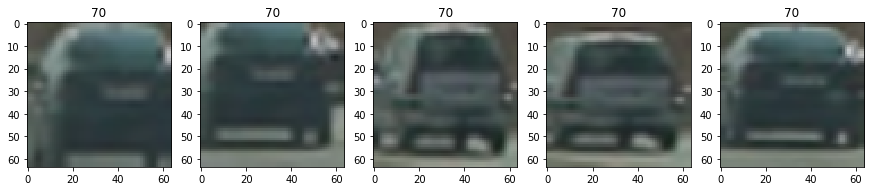

In [13]:
change=np.where(dist>2000)[0]+1
change=np.concatenate([[0],change])

las_features=np.zeros_like(ch[0])

q=0

for begining,end in zip(change[:-1],change[1:]):
    if end>begining+1:
        #plt.plot(change[begining:end])
        #plt.show()
        fig, ax = plt.subplots(1,end-begining)
        fig.set_figwidth(15)
        fig.set_figheight(5)
        for i in range(begining,end):
            img=mpl.image.imread(gl_far[i])
            ax[i-begining].imshow(img)
            ax[i-begining].set_title(str(begining))
        plt.savefig('output_images/similar_%d.png'%q)
        plt.show()
        q+=1
        if q>10:
            break